In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
nuclear_timestep = 0.05

coupling = 'varying'
comparison = 'XSH_1v2_phase/FSSH'

key1 = '1phase'
key2 = '2phase'

In [30]:
diabat_populations_1 = np.loadtxt(f'{coupling}/{comparison}/{key1}_diabat_populations.txt')
diabat_populations_2 = np.loadtxt(f'{coupling}/{comparison}/{key2}_diabat_populations.txt')

site_energies_1 = np.loadtxt(f'{coupling}/{comparison}/{key1}_site_energies.txt')
site_energies_2 = np.loadtxt(f'{coupling}/{comparison}/{key2}_site_energies.txt')

atomic_forces_1 = np.loadtxt(f'{coupling}/{comparison}/{key1}_atomic_forces.txt')
atomic_forces_2 = np.loadtxt(f'{coupling}/{comparison}/{key2}_atomic_forces.txt')

Text(0.5, 0.01, 'Simulation Time /fs')

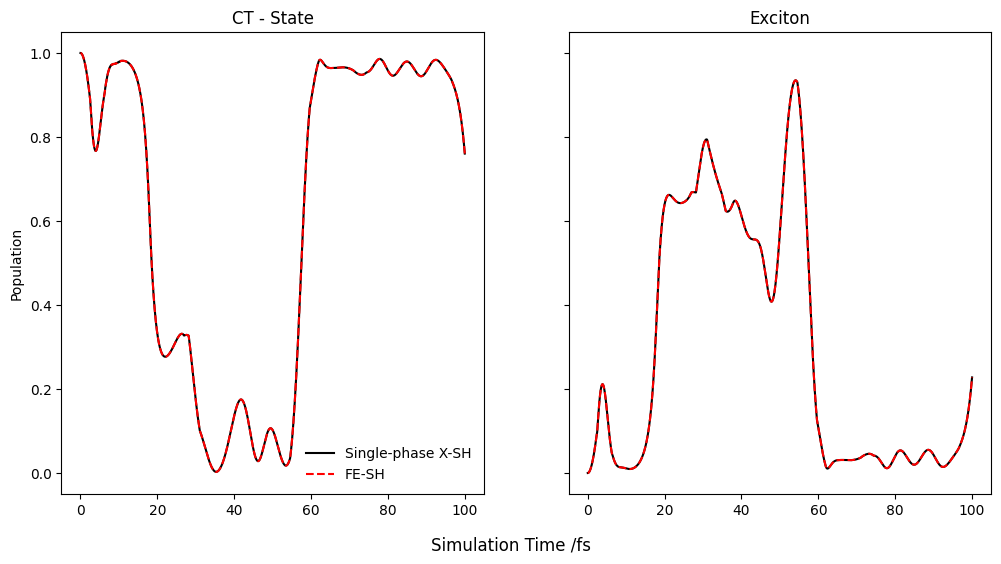

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12, 6), sharey = True)

axs[0].plot(np.arange(len(diabat_populations_1[:,6]))*nuclear_timestep, diabat_populations_1[:,6], color = 'k', label = 'Single-phase X-SH')
axs[0].plot(np.arange(len(diabat_populations_2[:,0]))*nuclear_timestep, diabat_populations_2[:,0], color = 'r', linestyle = 'dashed', label = 'FE-SH')
axs[0].legend(frameon=False)
axs[0].set_ylabel('Population')
axs[0].set_title('CT - State')

axs[1].plot(np.arange(len(diabat_populations_1[:,7]))*nuclear_timestep, diabat_populations_1[:,7], color = 'k')
axs[1].plot(np.arange(len(diabat_populations_2[:,1]))*nuclear_timestep, diabat_populations_2[:,1], color = 'r', linestyle = 'dashed')
axs[1].set_title('Exciton')

'''
axs[2].plot(np.arange(len(diabat_populations_1[:,8]))*nuclear_timestep, diabat_populations_1[:,8], color = 'k')
axs[2].plot(np.arange(len(diabat_populations_2[:,2]))*nuclear_timestep, diabat_populations_2[:,2], color = 'r', linestyle = 'dashed')
axs[2].set_title('Molecule 3')
'''


fig.supxlabel('Simulation Time /fs')

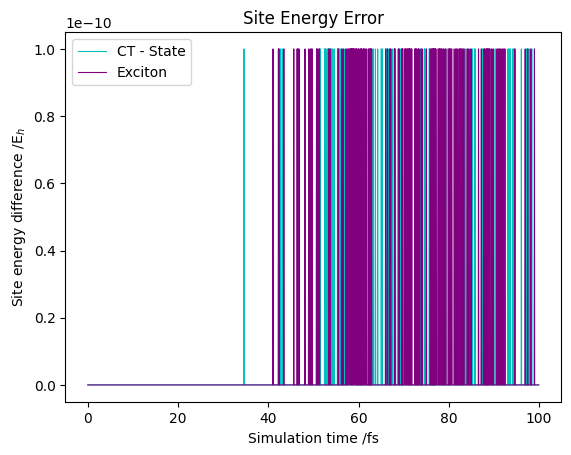

In [ ]:
plt.plot(np.arange(len(site_energies_1[:,0]))*nuclear_timestep, abs(site_energies_2[:,0] - site_energies_1[:,6]), color = 'c', label = 'CT - State', linewidth=0.8)
plt.plot(np.arange(len(site_energies_2[:,1]))*nuclear_timestep, abs(site_energies_2[:,1] - site_energies_1[:,7]), color = 'purple', label = 'Exciton', linewidth=0.8)
plt.title('Site Energy Error')
plt.ylabel('Site energy difference /E$_h$')
plt.xlabel('Simulation time /fs')
plt.legend()

Text(0.5, 1.0, 'Absolute Force Error - All Atoms and Axes')

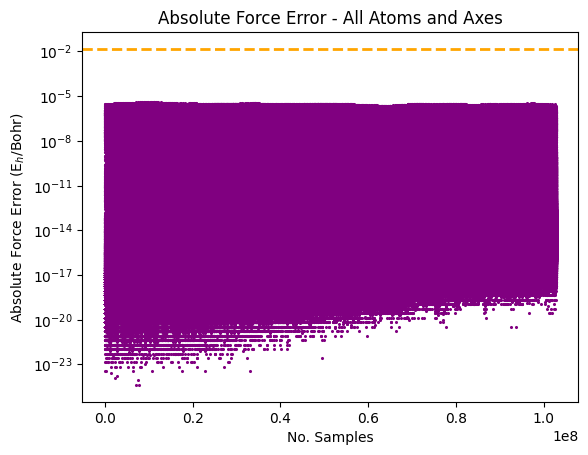

In [31]:
plt.scatter(np.arange(len(atomic_forces_1)), abs(atomic_forces_1-atomic_forces_2), color='purple', s=1.5)
plt.axhline(np.mean(abs(0.5*atomic_forces_1 + 0.5*atomic_forces_2)), linewidth=2, linestyle='--', color='orange')
plt.xlabel('No. Samples')
plt.ylabel('Absolute Force Error (E$_h$/Bohr)')
plt.yscale('log')
plt.title('Absolute Force Error - All Atoms and Axes')